In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load all experiment files and merge them into a single DataFrame
experiment_dir = '/Users/adham/Documents/MIDAS/MIDAS-PA-V1/Outputs/PA-experiments/'
output_dir = '/Users/adham/Documents/MIDAS/Charts/'
experiment_files = [f'PA_experiment_MC_analysis{i}.csv' for i in range(1, 273)]


In [3]:
# Combine all CSV files into a single DataFrame
dataframes = []
for file in experiment_files:
    try:
        df = pd.read_csv(experiment_dir + file)
        dataframes.append(df)
    except Exception as e:
        print(f"Could not process file {file}: {e}")

In [4]:
# Merge all data into a single DataFrame
results_df = pd.concat(dataframes, ignore_index=True)


In [5]:
# Categorize Place Attachment Mean into ranges
results_df['PA_Category'] = pd.cut(
    results_df['PlaceAttachmentMean'],
    bins=[0.0, 0.3, 0.6, 1.0],
    labels=['Low PA (0.0-0.3)', 'Medium PA (0.3-0.6)', 'High PA (0.6-1.0)']
)


In [6]:
# Categorize Number of Agents into ranges
def categorize_agents(num_agents):
    if num_agents > 1000:
        return "1000"
    elif 500 <= num_agents <= 1000:
        return "500"
    elif 200 <= num_agents <= 499:
        return "200"
    else:
        return "100"

results_df['Agent_Category'] = results_df['AgentID'].apply(categorize_agents)


In [19]:
# Explicitly define the order of Agent_Category
agent_category_order = ["1000", "500", "200", "100"]
results_df['Agent_Category'] = pd.Categorical(
    results_df['Agent_Category'], categories=agent_category_order, ordered=True
)


In [21]:
# Metrics to analyze
metrics = [
    ('TimeStepsAwayFromHome', 'Time Steps Away From Home'),
    ('AvgDistanceAwayFromHome', 'Average Distance Away From Home'),
    ('FractionMovesHome', 'Fraction of Moves Home (%)'),
    ('AvgDistancePerMove', 'Average Distance Per Move'),
    ('TotalDistanceTraveled', 'Total Distance Traveled'),
    ('NumReturnsToHome', 'Number of Returns to Home')
]


Saved heatmap: TimeStepsAwayFromHome_heatmap_Medium_PA_0_3-0_6.png


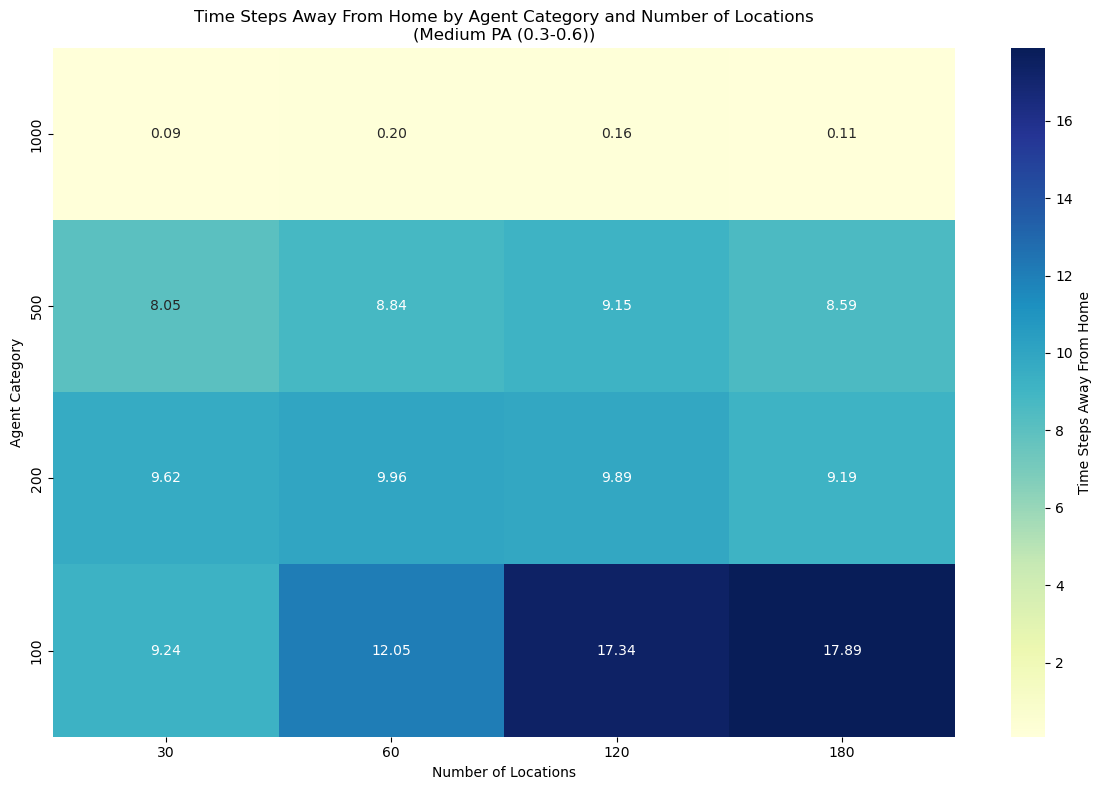

Saved heatmap: AvgDistanceAwayFromHome_heatmap_Medium_PA_0_3-0_6.png


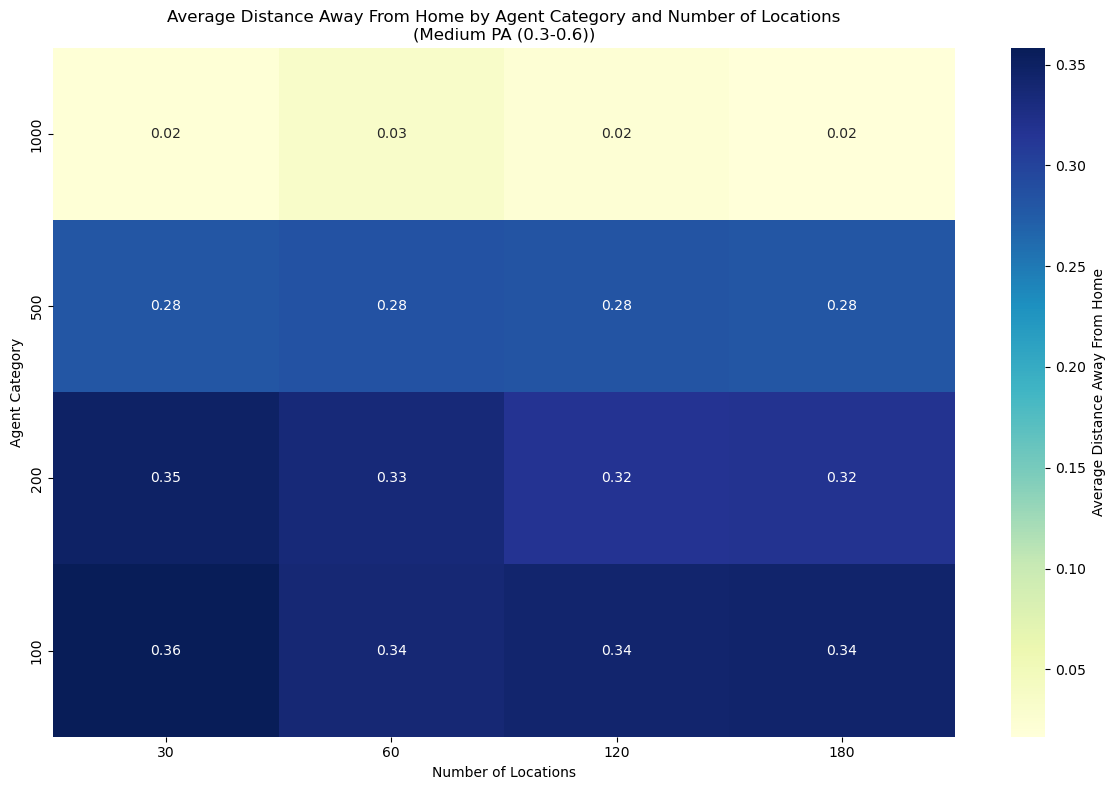

Saved heatmap: FractionMovesHome_heatmap_Medium_PA_0_3-0_6.png


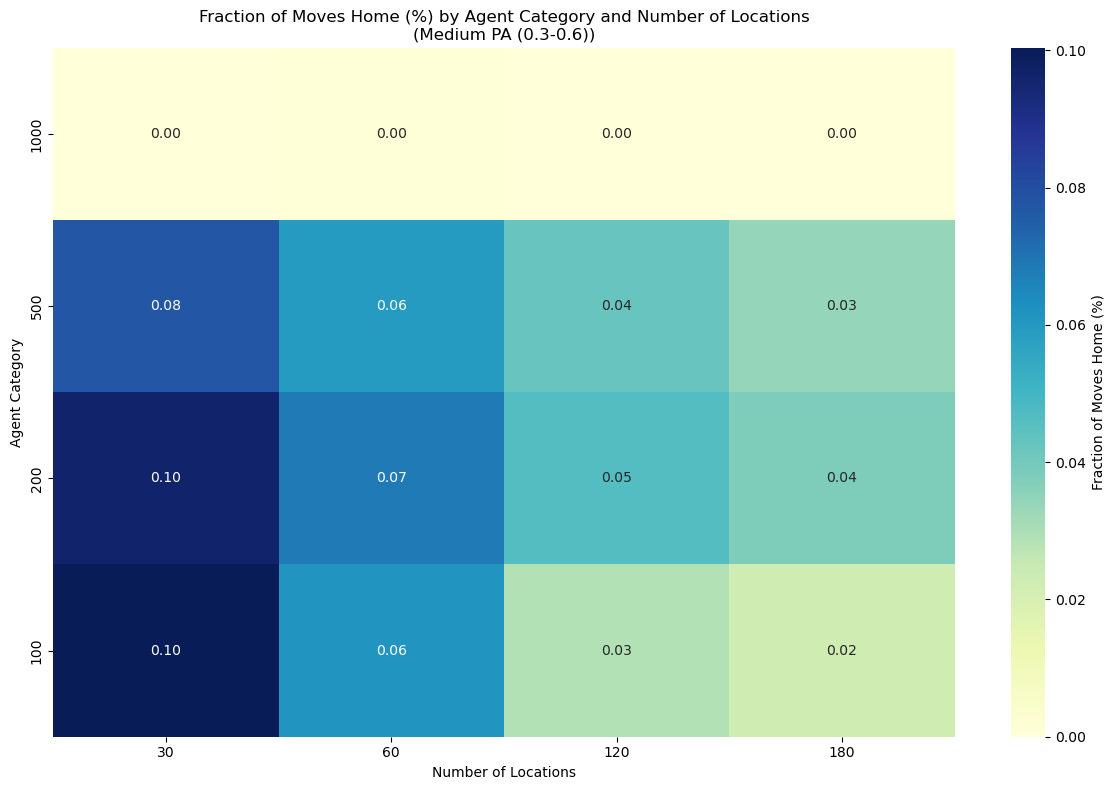

Saved heatmap: AvgDistancePerMove_heatmap_Medium_PA_0_3-0_6.png


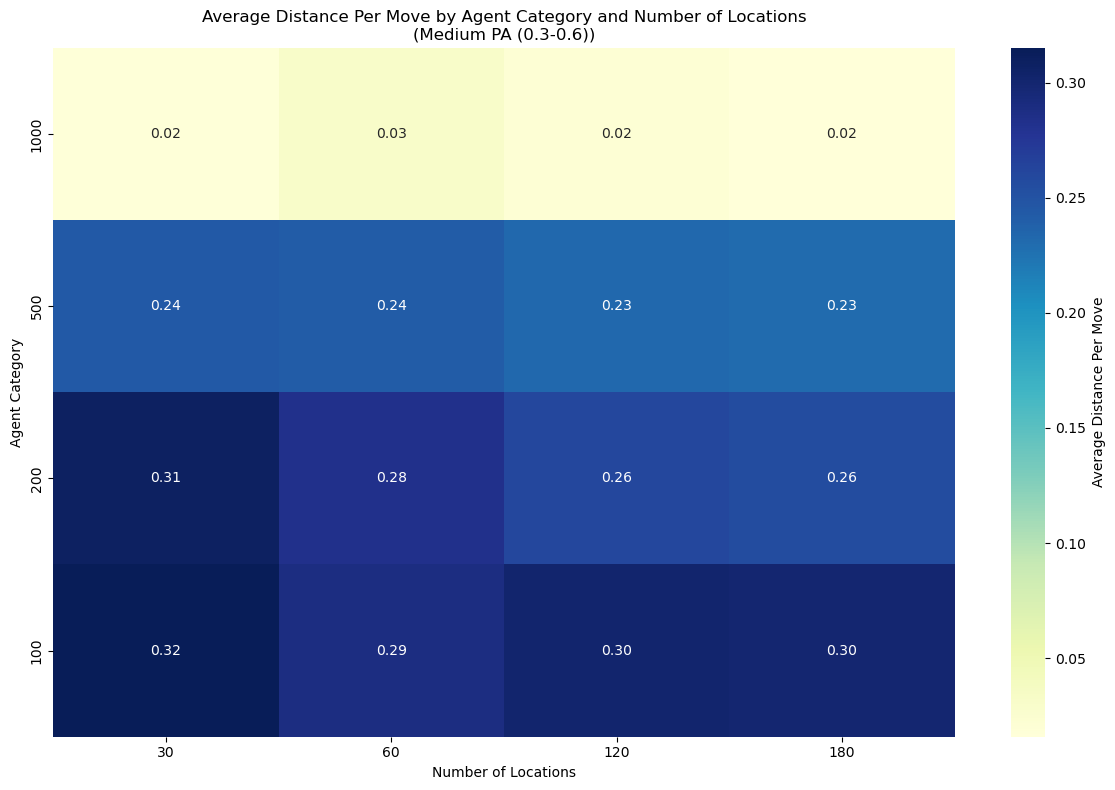

Saved heatmap: TotalDistanceTraveled_heatmap_Medium_PA_0_3-0_6.png


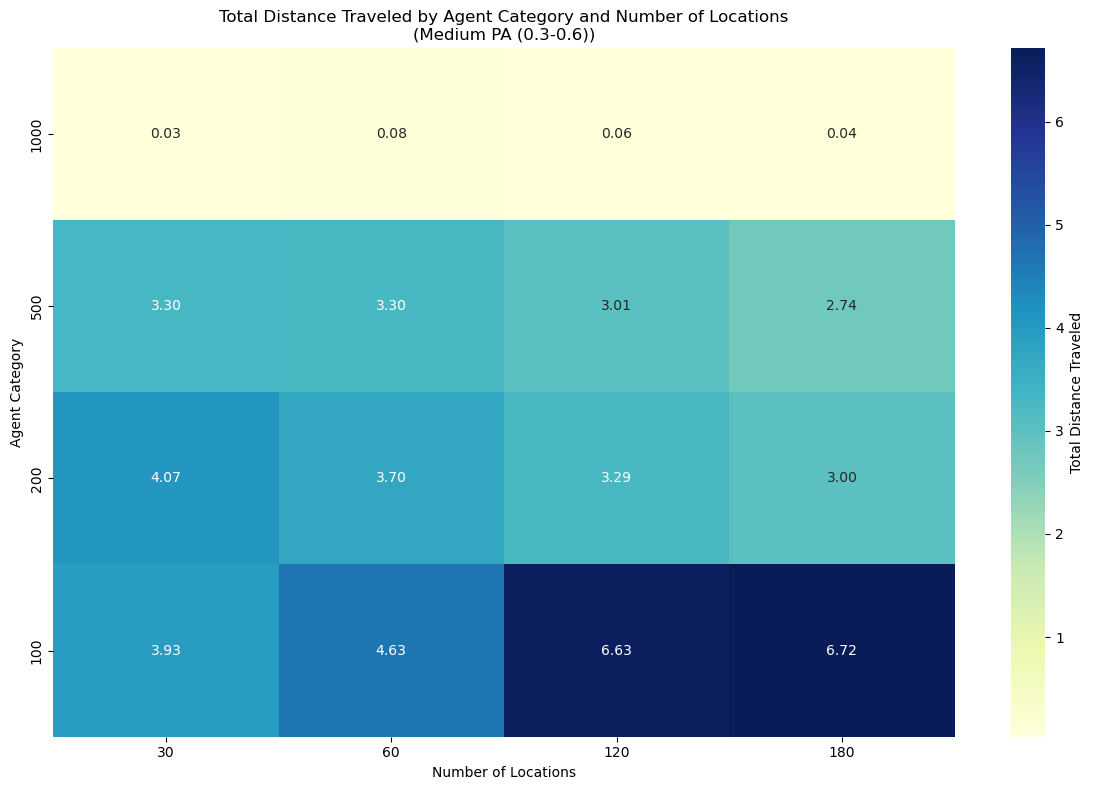

Saved heatmap: NumReturnsToHome_heatmap_Medium_PA_0_3-0_6.png


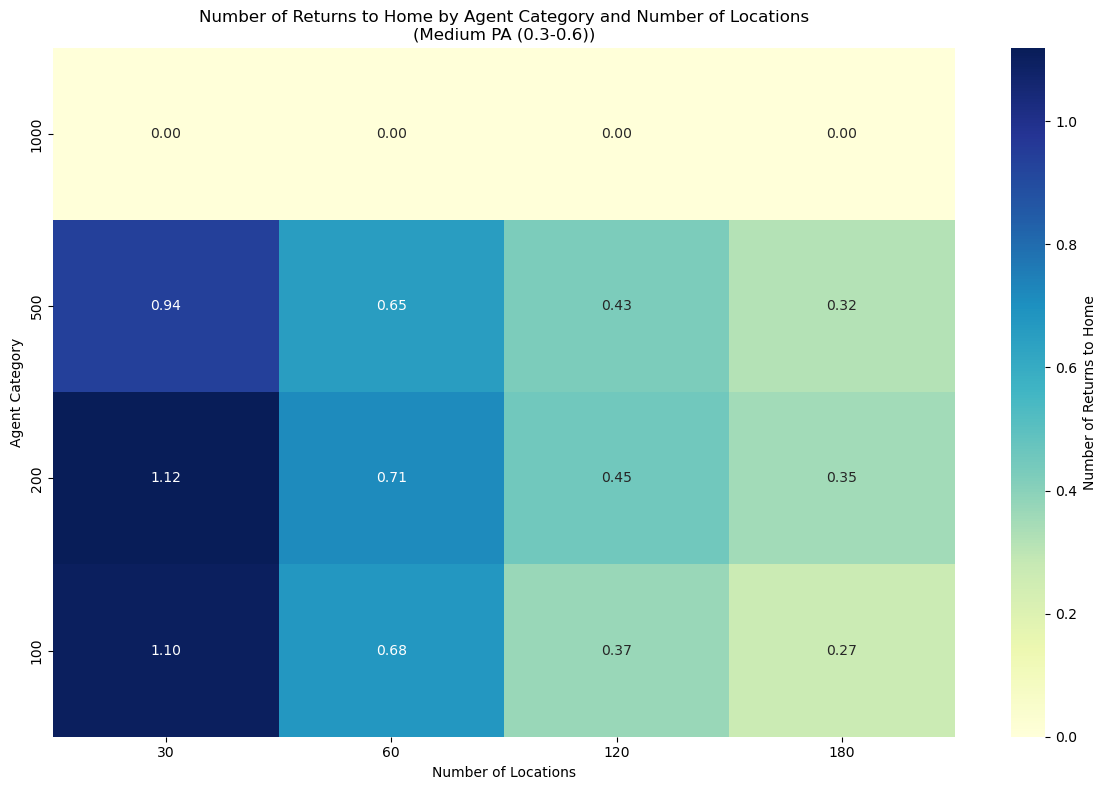

Saved heatmap: TimeStepsAwayFromHome_heatmap_High_PA_0_6-1_0.png


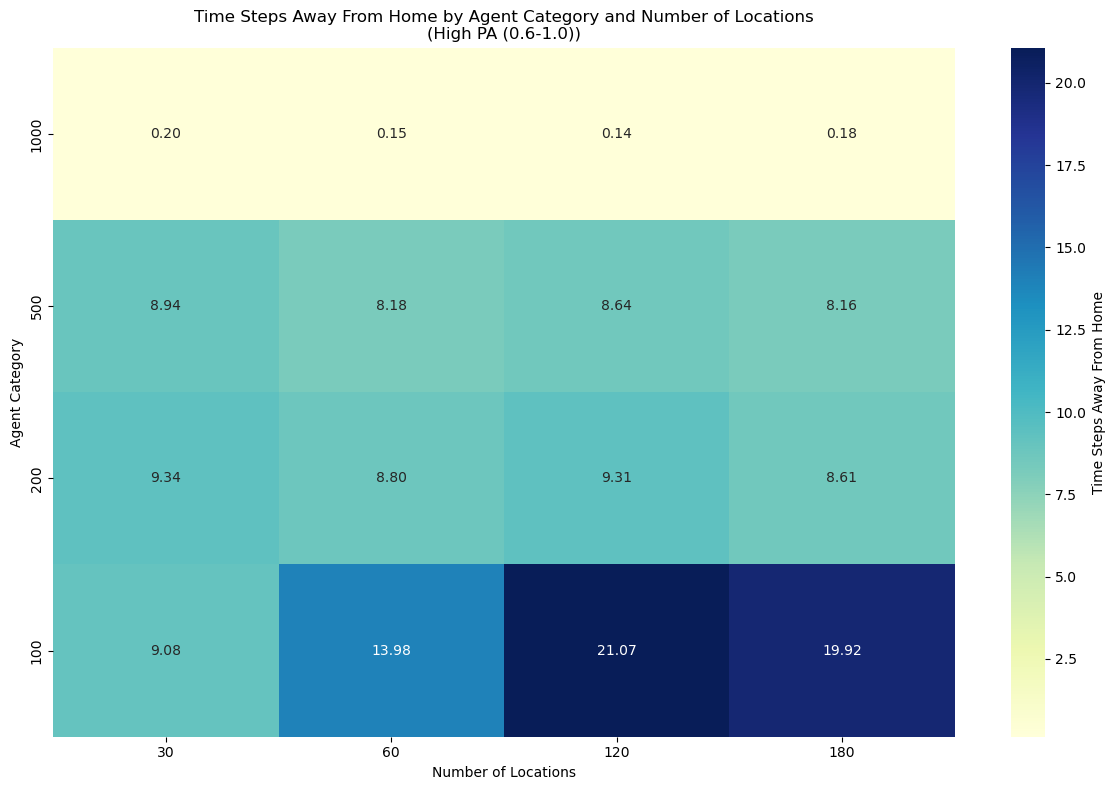

Saved heatmap: AvgDistanceAwayFromHome_heatmap_High_PA_0_6-1_0.png


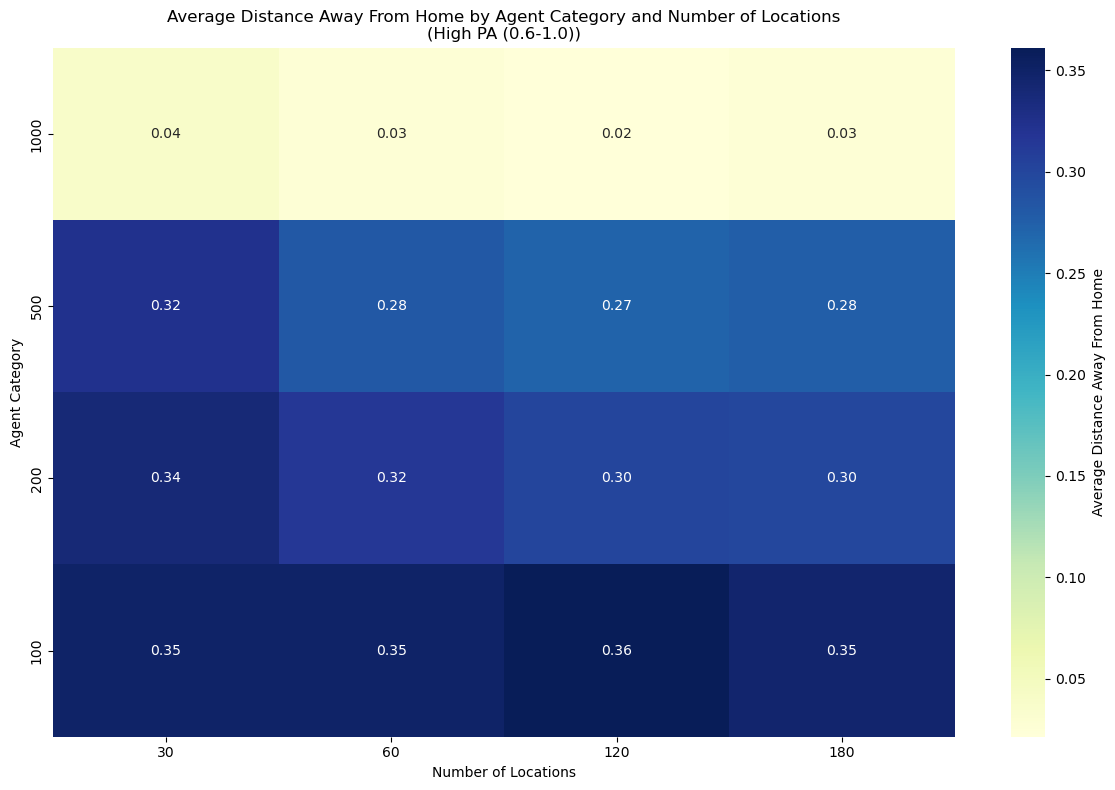

Saved heatmap: FractionMovesHome_heatmap_High_PA_0_6-1_0.png


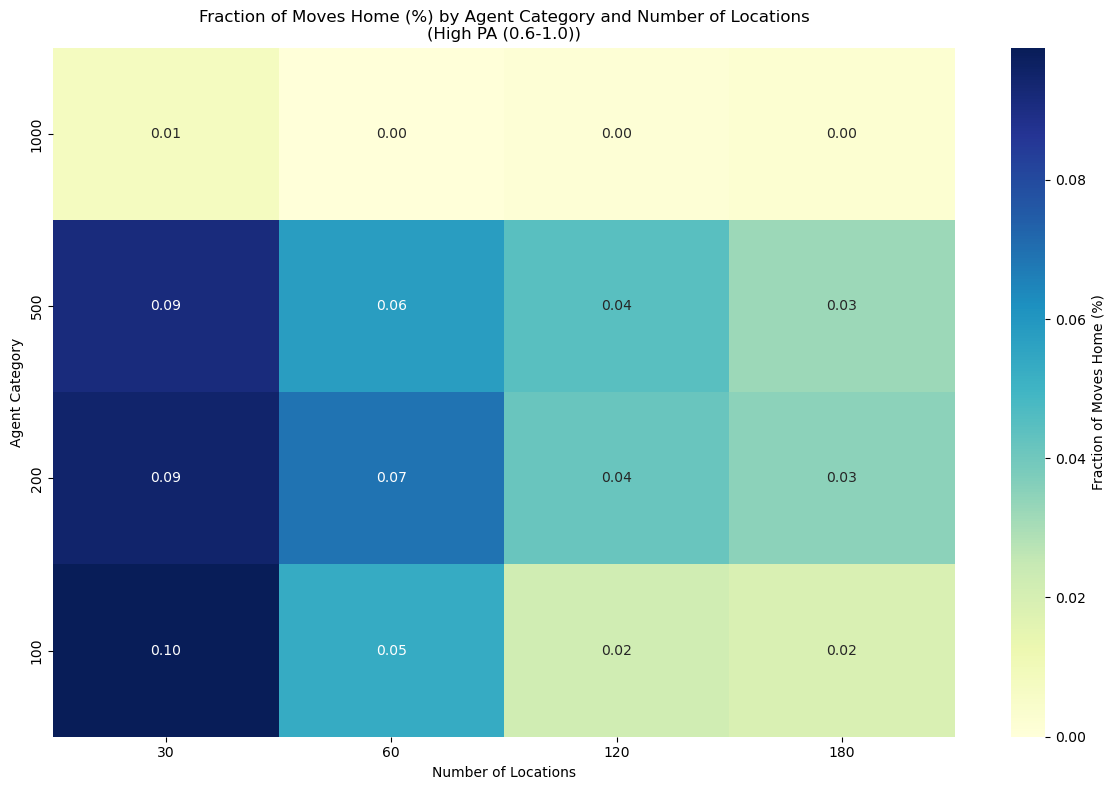

Saved heatmap: AvgDistancePerMove_heatmap_High_PA_0_6-1_0.png


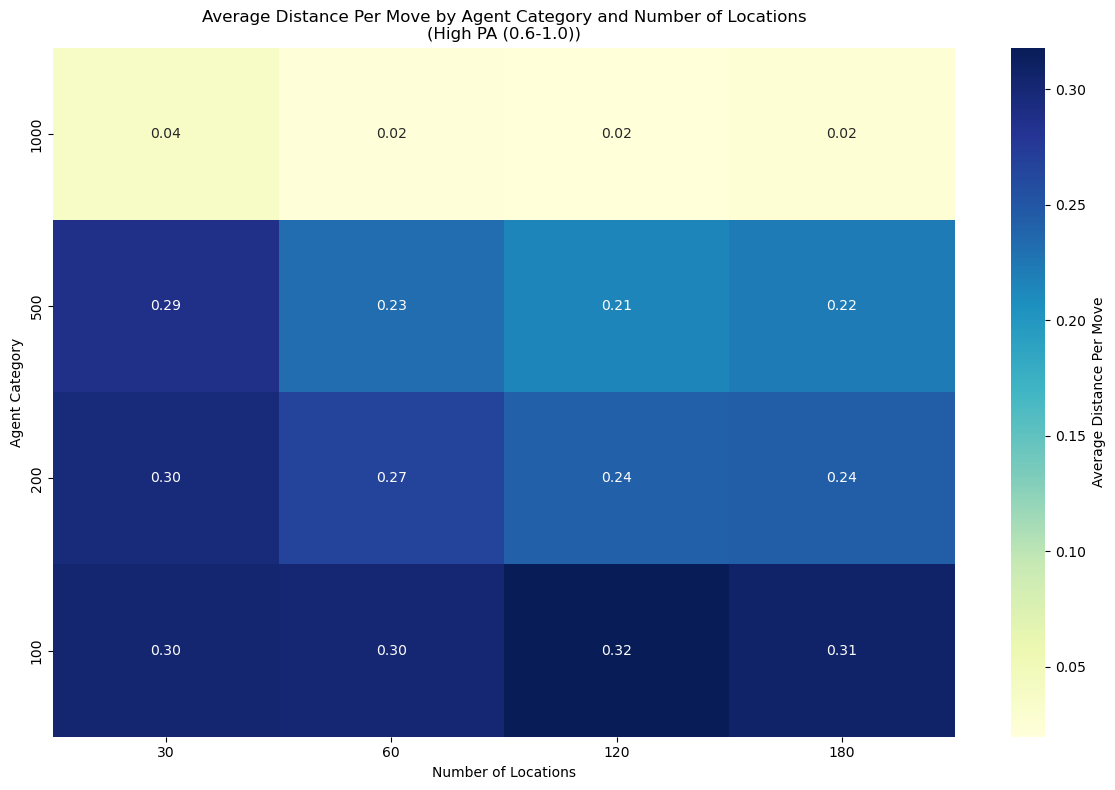

Saved heatmap: TotalDistanceTraveled_heatmap_High_PA_0_6-1_0.png


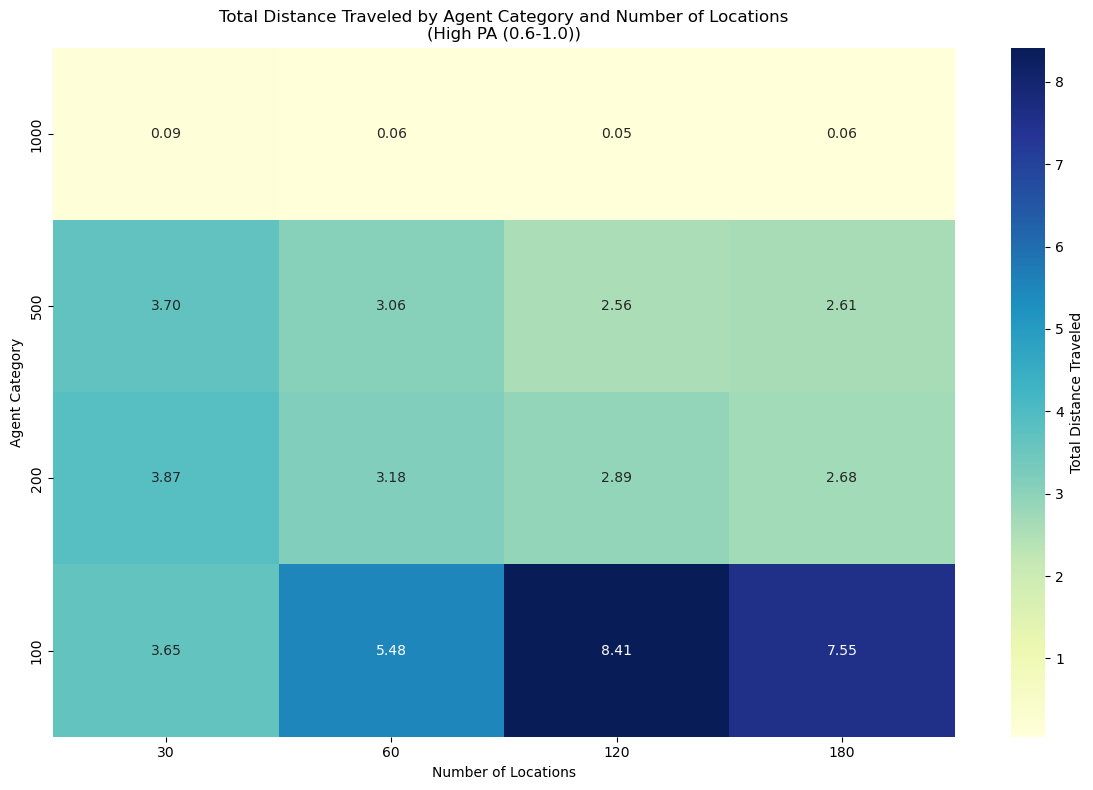

Saved heatmap: NumReturnsToHome_heatmap_High_PA_0_6-1_0.png


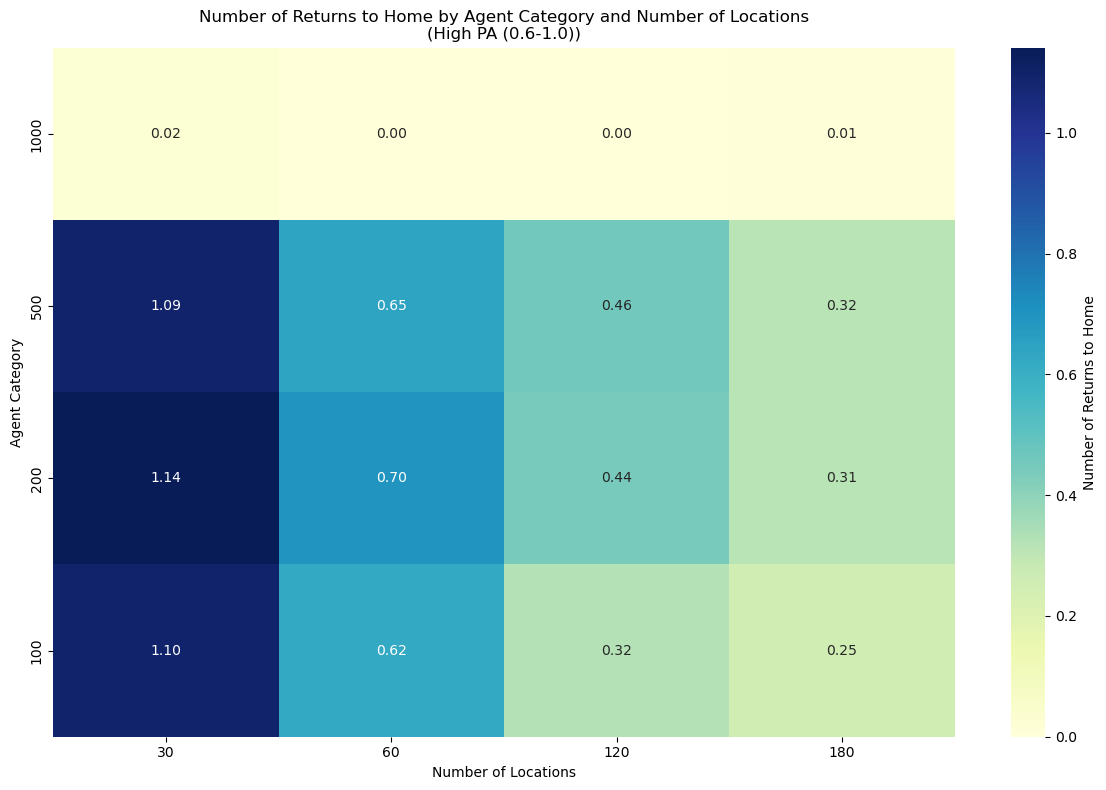

Saved heatmap: TimeStepsAwayFromHome_heatmap_Low_PA_0_0-0_3.png


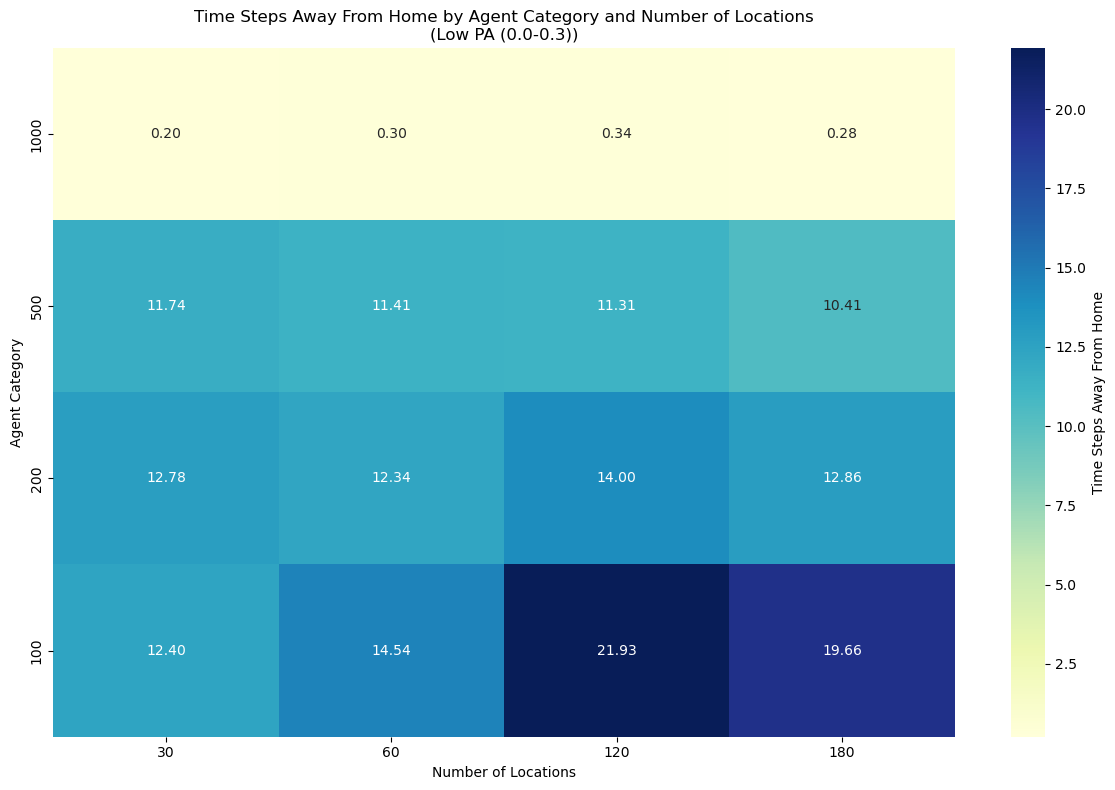

Saved heatmap: AvgDistanceAwayFromHome_heatmap_Low_PA_0_0-0_3.png


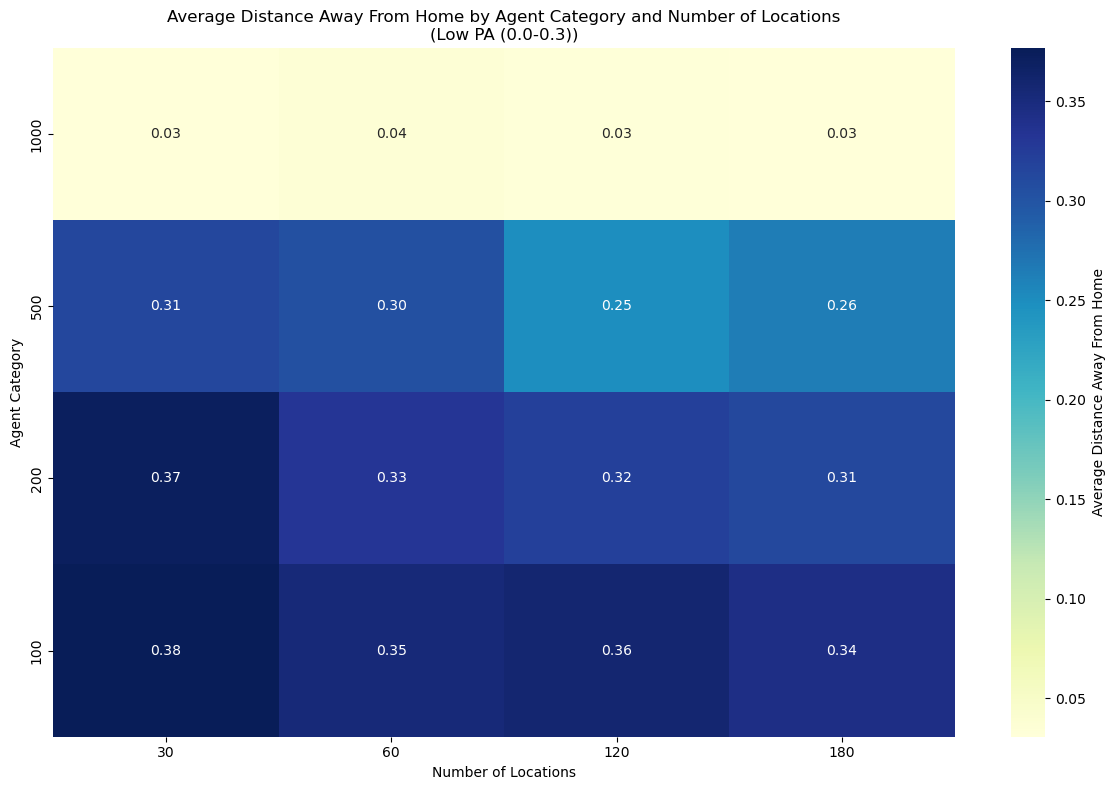

Saved heatmap: FractionMovesHome_heatmap_Low_PA_0_0-0_3.png


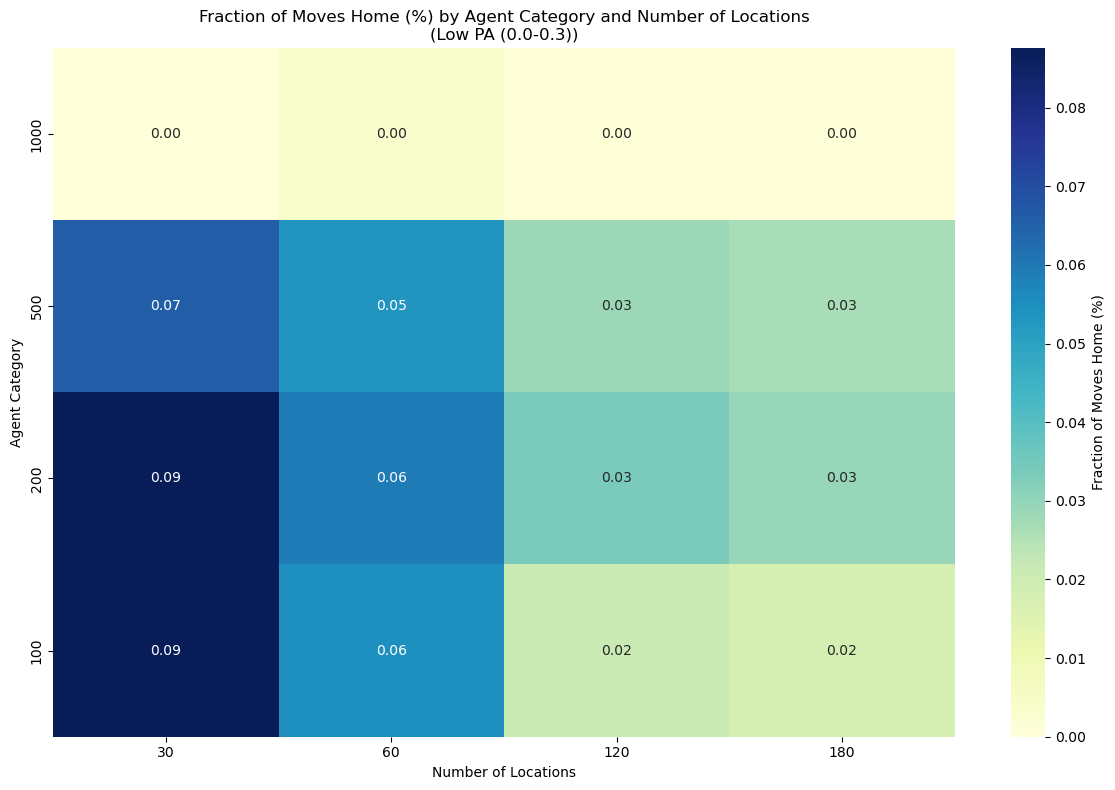

Saved heatmap: AvgDistancePerMove_heatmap_Low_PA_0_0-0_3.png


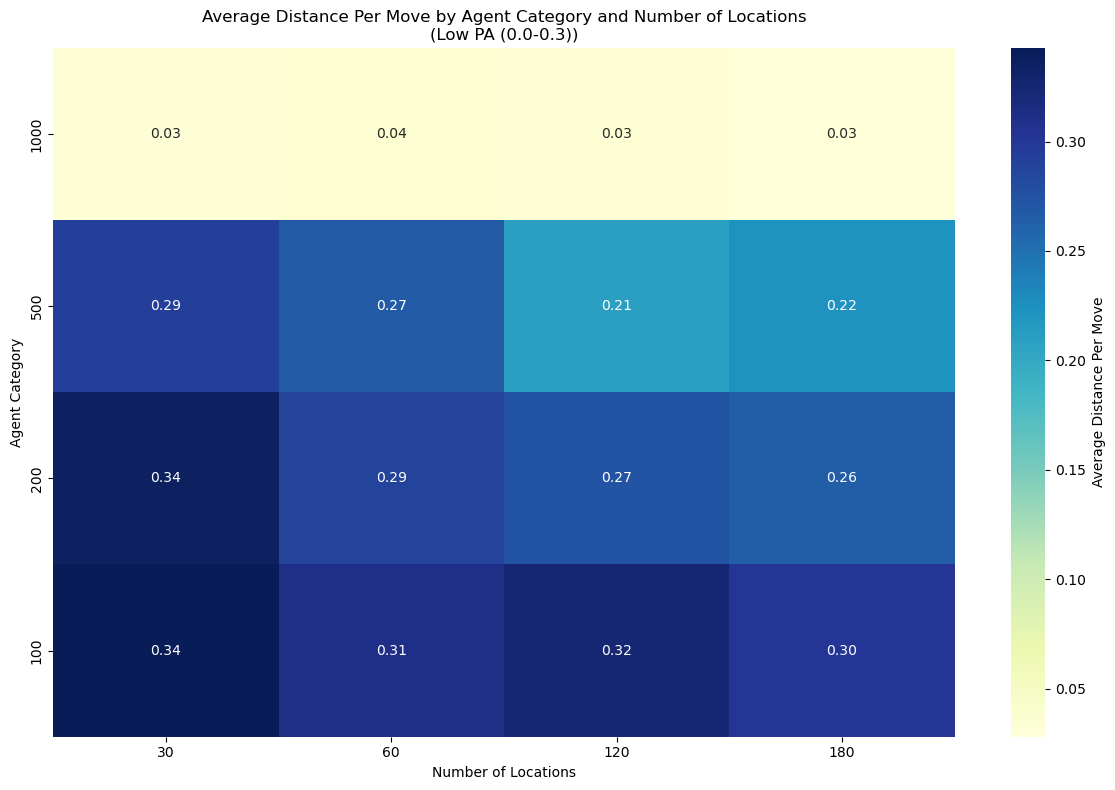

Saved heatmap: TotalDistanceTraveled_heatmap_Low_PA_0_0-0_3.png


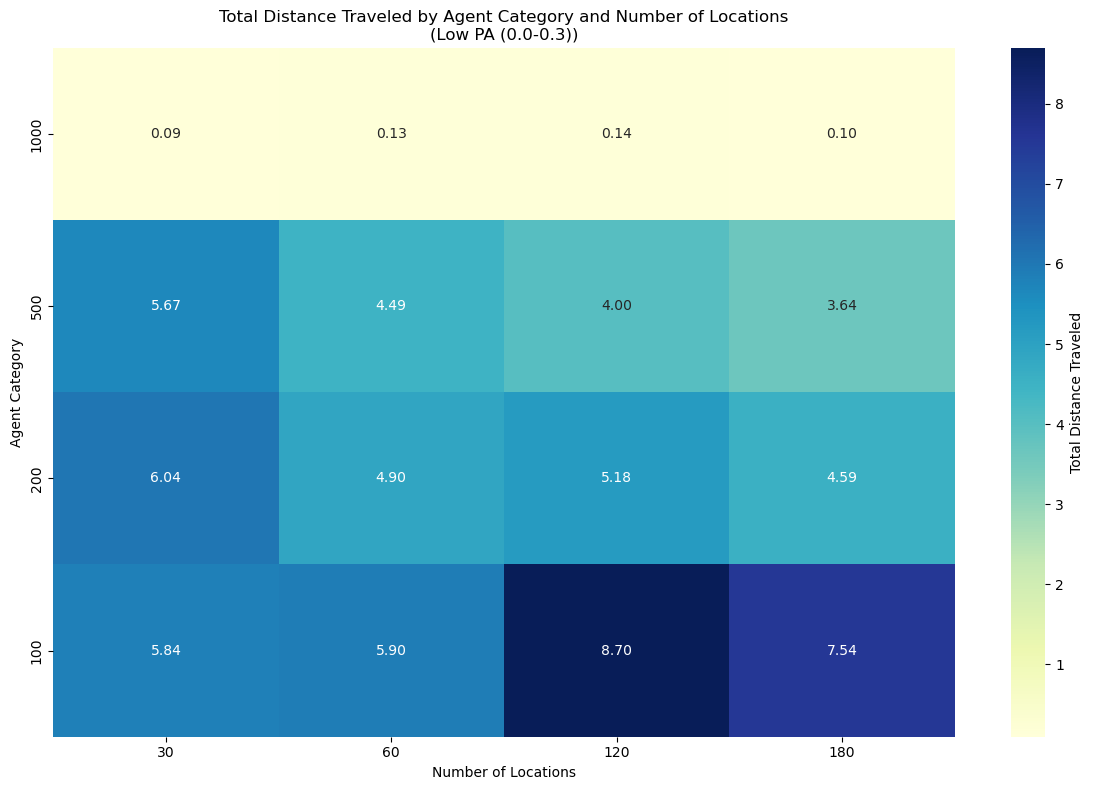

Saved heatmap: NumReturnsToHome_heatmap_Low_PA_0_0-0_3.png


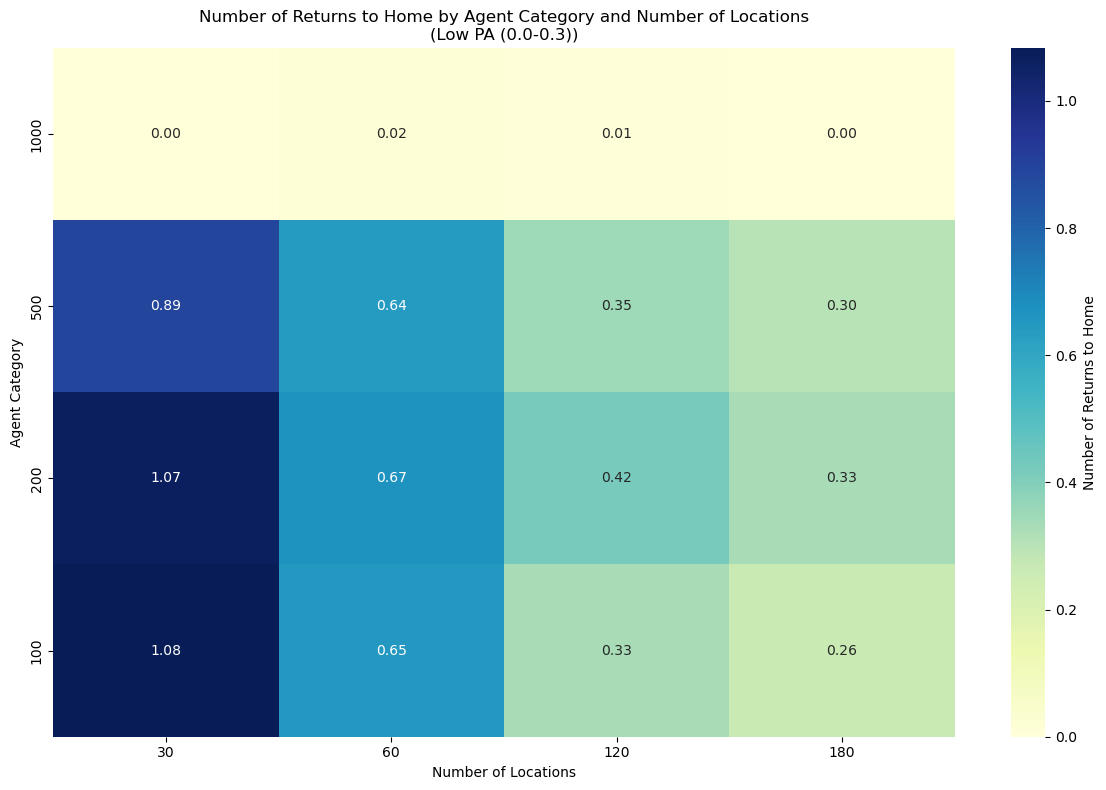

In [23]:
# Create heatmaps for each PA range
pa_categories = results_df['PA_Category'].unique()
for pa_category in pa_categories:
    subset = results_df[results_df['PA_Category'] == pa_category]

    for metric, metric_label in metrics:
        # Aggregate metric values by Agent Category and Number of Locations
        pivot_table = subset.pivot_table(
            index='Agent_Category',
            columns='NumLocations',
            values=metric,
            aggfunc='mean'
        )

        # Generate the heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(
            pivot_table,
            annot=True,
            fmt='.2f',
            cmap='YlGnBu',
            cbar_kws={'label': metric_label}
        )
        plt.title(f"{metric_label} by Agent Category and Number of Locations\n({pa_category})")
        plt.ylabel('Agent Category')
        plt.xlabel('Number of Locations')
        plt.tight_layout()

        # Save the figure
        output_file = f"{metric}_heatmap_{pa_category.replace(' ', '_').replace('(', '').replace(')', '').replace('.', '_')}.png"
        plt.savefig(output_dir + output_file)
        print(f"Saved heatmap: {output_file}")
        plt.show()